<a href="https://colab.research.google.com/github/gotserena/data_viz_2022/blob/main/missing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn 
from sklearn.impute import KNNImputer

In [38]:
from google.colab import drive   
drive.mount('/content/drive')
path = '/content/drive/My Drive/project 2023'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data_file_path = os.path.join(path,'330.csv')
data= pd.read_csv(data_file_path)    

In [40]:
data

,Sex,AgeSYear,biological age from telomere length,telomere length (kb),DHEAs (BRIA),Weight,Height,BMI,SMM,Fat Mass,...,GGT,Glucose,HbA1c,AMY7,BUN,Creatinine,LD-P,Uric Acid,CK,GFR
0,1.0,32.0,62.1,30.00,NaN,62.0,178.0,19.6,NaN,NaN,...,NaN,89.0,5.1,NaN,9.0,1.0,NaN,NaN,NaN,100.15
1,2.0,20.0,5.1,11.94,108,65.0,177.0,20.7,NaN,NaN,...,NaN,91.0,NaN,NaN,16.0,0.8,NaN,3.8,NaN,117.25
2,2.0,21.0,6.3,11.82,NaN,51.6,160.0,20.2,20.8,13.8,...,12.0,77.0,3.4,127.0,12.0,0.9,494.0,5.4,94.0,112.01
3,2.0,20.0,7.1,11.74,NaN,48.0,152.0,20.8,19.5,13.0,...,NaN,78.0,NaN,NaN,14.0,0.6,NaN,4.2,NaN,128.89
4,2.0,22.0,9.1,11.54,NaN,53.0,161.0,20.4,NaN,NaN,...,NaN,78.0,NaN,NaN,14.0,0.8,NaN,5.1,NaN,115.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2.0,86.0,79.0,4.55,NaN,49.0,154.0,20.7,NaN,NaN,...,17.0,108.0,6.2,46.0,9.0,0.7,376.0,5.4,25.0,77.06
420,1.0,74.0,72.7,4.54,82.6,61.1,170.0,21.1,28.8,9.5,...,17.0,83.0,7.1,131.0,17.0,1.1,290.0,6.2,89.0,72.26
421,1.0,68.0,75.3,4.28,NaN,71.2,189.0,19.9,36.5,6.0,...,9.0,94.0,4.2,120.0,13.0,0.9,610.0,5.6,355.0,80.51
422,1.0,66.0,75.9,4.22,255,80.0,172.0,27.0,NaN,NaN,...,NaN,103.0,NaN,NaN,14.0,1.1,NaN,5.7,NaN,76.43


#data cleansing

In [41]:
data = data.drop(423, axis=0)
data.drop(['DHEAs (BRIA)', 'biological age from telomere length'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [42]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,SMM,Fat Mass,% Body fat,abdominal circumference,...,GGT,Glucose,HbA1c,AMY7,BUN,Creatinine,LD-P,Uric Acid,CK,GFR
0,1.0,32.0,30.00,62.0,178.0,19.6,NaN,NaN,NaN,NaN,...,NaN,89.0,5.1,NaN,9.0,1.0,NaN,NaN,NaN,100.15
1,2.0,20.0,11.94,65.0,177.0,20.7,NaN,NaN,NaN,NaN,...,NaN,91.0,NaN,NaN,16.0,0.8,NaN,3.8,NaN,117.25
2,2.0,21.0,11.82,51.6,160.0,20.2,20.8,13.8,26.7,72.1,...,12.0,77.0,3.4,127.0,12.0,0.9,494.0,5.4,94.0,112.01
3,2.0,20.0,11.74,48.0,152.0,20.8,19.5,13.0,26.9,71.2,...,NaN,78.0,NaN,NaN,14.0,0.6,NaN,4.2,NaN,128.89
4,2.0,22.0,11.54,53.0,161.0,20.4,NaN,NaN,NaN,NaN,...,NaN,78.0,NaN,NaN,14.0,0.8,NaN,5.1,NaN,115.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2.0,76.0,4.79,53.8,150.0,23.9,18.6,19.6,36.4,78.9,...,11.0,86.0,6.2,99.0,13.0,1.0,373.0,4.4,102.0,73.52
419,2.0,86.0,4.55,49.0,154.0,20.7,NaN,NaN,NaN,NaN,...,17.0,108.0,6.2,46.0,9.0,0.7,376.0,5.4,25.0,77.06
420,1.0,74.0,4.54,61.1,170.0,21.1,28.8,9.5,15.5,77.9,...,17.0,83.0,7.1,131.0,17.0,1.1,290.0,6.2,89.0,72.26
421,1.0,68.0,4.28,71.2,189.0,19.9,36.5,6.0,8.4,72.9,...,9.0,94.0,4.2,120.0,13.0,0.9,610.0,5.6,355.0,80.51


In [43]:
data.shape

(423, 37)

In [44]:
data.isnull().sum()

Sex                          0
AgeSYear                     0
telomere length (kb)         0
Weight                       8
Height                       8
BMI                          8
SMM                        225
Fat Mass                   225
% Body fat                 225
abdominal circumference    226
waist to hip radio         225
Systolic                     8
Diastolic                    9
HeartRate                   51
visceral fat area          225
Cholesterol                  0
Triglyceride                 0
HDL-C                        0
LDL                          0
homocysteine               292
TP1                        249
ALB1                       249
TBIL                       249
DBIL                       249
Alkaline Phos               29
ALT                          1
AST                          0
GGT                        249
Glucose                      1
HbA1c                      167
AMY7                       249
BUN                          0
Creatini

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sex                      423 non-null    float64
 1   AgeSYear                 423 non-null    float64
 2   telomere length (kb)     423 non-null    float64
 3   Weight                   415 non-null    float64
 4   Height                   415 non-null    float64
 5   BMI                      415 non-null    float64
 6   SMM                      198 non-null    float64
 7   Fat Mass                 198 non-null    float64
 8   % Body fat               198 non-null    float64
 9   abdominal circumference  197 non-null    float64
 10  waist to hip radio       198 non-null    float64
 11  Systolic                 415 non-null    float64
 12  Diastolic                414 non-null    float64
 13  HeartRate                372 non-null    float64
 14  visceral fat area        1

In [46]:
mean_weight = data['Weight'].mean()
data['Weight'].fillna(mean_weight, inplace =True)

In [47]:
mean_Height = data['Height'].mean()
data['Height'].fillna(mean_Height, inplace =True)

In [48]:
newBMI=data['Weight'] / (( data['Height']/100)**2)
data['BMI'].fillna(newBMI, inplace =True)

In [49]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,SMM,Fat Mass,% Body fat,abdominal circumference,...,GGT,Glucose,HbA1c,AMY7,BUN,Creatinine,LD-P,Uric Acid,CK,GFR
0,1.0,32.0,30.00,62.0,178.0,19.6,NaN,NaN,NaN,NaN,...,NaN,89.0,5.1,NaN,9.0,1.0,NaN,NaN,NaN,100.15
1,2.0,20.0,11.94,65.0,177.0,20.7,NaN,NaN,NaN,NaN,...,NaN,91.0,NaN,NaN,16.0,0.8,NaN,3.8,NaN,117.25
2,2.0,21.0,11.82,51.6,160.0,20.2,20.8,13.8,26.7,72.1,...,12.0,77.0,3.4,127.0,12.0,0.9,494.0,5.4,94.0,112.01
3,2.0,20.0,11.74,48.0,152.0,20.8,19.5,13.0,26.9,71.2,...,NaN,78.0,NaN,NaN,14.0,0.6,NaN,4.2,NaN,128.89
4,2.0,22.0,11.54,53.0,161.0,20.4,NaN,NaN,NaN,NaN,...,NaN,78.0,NaN,NaN,14.0,0.8,NaN,5.1,NaN,115.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2.0,76.0,4.79,53.8,150.0,23.9,18.6,19.6,36.4,78.9,...,11.0,86.0,6.2,99.0,13.0,1.0,373.0,4.4,102.0,73.52
419,2.0,86.0,4.55,49.0,154.0,20.7,NaN,NaN,NaN,NaN,...,17.0,108.0,6.2,46.0,9.0,0.7,376.0,5.4,25.0,77.06
420,1.0,74.0,4.54,61.1,170.0,21.1,28.8,9.5,15.5,77.9,...,17.0,83.0,7.1,131.0,17.0,1.1,290.0,6.2,89.0,72.26
421,1.0,68.0,4.28,71.2,189.0,19.9,36.5,6.0,8.4,72.9,...,9.0,94.0,4.2,120.0,13.0,0.9,610.0,5.6,355.0,80.51


In [50]:
data1 = data.dropna(axis=0)


In [51]:
data1

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,SMM,Fat Mass,% Body fat,abdominal circumference,...,GGT,Glucose,HbA1c,AMY7,BUN,Creatinine,LD-P,Uric Acid,CK,GFR
2,2.0,21.0,11.82,51.6,160.0,20.2,20.8,13.8,26.7,72.1,...,12.0,77.0,3.4,127.0,12.0,0.9,494.0,5.4,94.0,112.01
6,2.0,22.0,11.40,48.6,155.0,20.2,20.2,12.1,24.9,70.1,...,14.0,82.0,6.1,102.0,13.0,0.7,321.0,2.9,49.0,120.81
11,2.0,20.0,10.82,47.2,159.0,18.7,20.5,10.3,21.8,68.0,...,11.0,84.0,4.5,117.0,12.0,0.8,273.0,3.9,41.0,117.25
19,2.0,32.0,10.57,49.9,163.0,18.8,22.2,10.1,20.2,67.8,...,25.0,84.0,4.1,119.0,8.0,0.9,296.0,3.9,103.0,103.68
27,2.0,25.0,10.30,50.5,158.0,20.2,20.5,13.3,26.3,71.5,...,13.0,79.0,5.3,145.0,14.0,0.5,344.0,3.9,52.0,132.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2.0,70.0,5.30,43.1,150.0,19.2,17.3,11.7,27.1,69.6,...,9.0,87.0,4.9,108.0,8.0,0.9,302.0,4.1,61.0,79.39
417,2.0,71.0,5.02,40.9,150.0,18.2,17.6,9.1,22.2,66.6,...,17.0,79.0,4.4,139.0,17.0,0.7,497.0,3.6,94.0,85.63
418,2.0,76.0,4.79,53.8,150.0,23.9,18.6,19.6,36.4,78.9,...,11.0,86.0,6.2,99.0,13.0,1.0,373.0,4.4,102.0,73.52
420,1.0,74.0,4.54,61.1,170.0,21.1,28.8,9.5,15.5,77.9,...,17.0,83.0,7.1,131.0,17.0,1.1,290.0,6.2,89.0,72.26


In [52]:
data.isnull().sum()

Sex                          0
AgeSYear                     0
telomere length (kb)         0
Weight                       0
Height                       0
BMI                          0
SMM                        225
Fat Mass                   225
% Body fat                 225
abdominal circumference    226
waist to hip radio         225
Systolic                     8
Diastolic                    9
HeartRate                   51
visceral fat area          225
Cholesterol                  0
Triglyceride                 0
HDL-C                        0
LDL                          0
homocysteine               292
TP1                        249
ALB1                       249
TBIL                       249
DBIL                       249
Alkaline Phos               29
ALT                          1
AST                          0
GGT                        249
Glucose                      1
HbA1c                      167
AMY7                       249
BUN                          0
Creatini

In [53]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data1, test_size = 0.3)

x_train = train.drop('telomere length (kb)', axis=1)
y_train = train['telomere length (kb)']

x_test = test.drop('telomere length (kb)', axis = 1)
y_test = test['telomere length (kb)']

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [55]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.603153143027827
RMSE value for k=  2 is: 1.4342917615125792
RMSE value for k=  3 is: 1.440758398172561
RMSE value for k=  4 is: 1.416681673589983
RMSE value for k=  5 is: 1.4516992604727548
RMSE value for k=  6 is: 1.4935285002143017
RMSE value for k=  7 is: 1.4645343342941914
RMSE value for k=  8 is: 1.4803887640944668
RMSE value for k=  9 is: 1.4595817211466673
RMSE value for k=  10 is: 1.4382049327447841
RMSE value for k=  11 is: 1.4246310734346326
RMSE value for k=  12 is: 1.4406571403466357
RMSE value for k=  13 is: 1.4301726985196126
RMSE value for k=  14 is: 1.4224494744238299
RMSE value for k=  15 is: 1.4447944918947901
RMSE value for k=  16 is: 1.4499966479333175
RMSE value for k=  17 is: 1.4587375347383684
RMSE value for k=  18 is: 1.4615195819886078
RMSE value for k=  19 is: 1.4674904022609951
RMSE value for k=  20 is: 1.4707687421403626


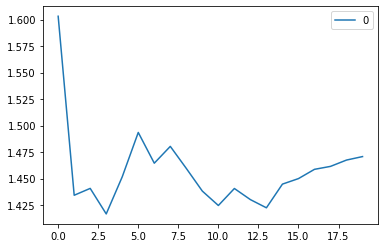

In [70]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

plt.savefig('curveKNN.png')

In [71]:
imputer = KNNImputer(n_neighbors=3)


In [72]:
df_filled = imputer.fit_transform(data)


In [73]:
df_filled

array([[  1.        ,  32.        ,  30.        , ...,   6.46666667,
        196.33333333, 100.15      ],
       [  2.        ,  20.        ,  11.94      , ...,   3.8       ,
        122.66666667, 117.25      ],
       [  2.        ,  21.        ,  11.82      , ...,   5.4       ,
         94.        , 112.01      ],
       ...,
       [  1.        ,  74.        ,   4.54      , ...,   6.2       ,
         89.        ,  72.26      ],
       [  1.        ,  68.        ,   4.28      , ...,   5.6       ,
        355.        ,  80.51      ],
       [  1.        ,  66.        ,   4.22      , ...,   5.7       ,
        158.        ,  76.43      ]])

In [74]:
df = pd.DataFrame(df_filled)

In [75]:
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,32.0,30.00,62.0,178.0,19.6,30.266667,15.733333,22.466667,86.766667,...,24.000000,89.0,5.100000,84.000000,9.0,1.0,477.666667,6.466667,196.333333,100.15
1,2.0,20.0,11.94,65.0,177.0,20.7,28.766667,15.666667,22.800000,82.400000,...,32.333333,91.0,4.766667,85.000000,16.0,0.8,461.666667,3.800000,122.666667,117.25
2,2.0,21.0,11.82,51.6,160.0,20.2,20.800000,13.800000,26.700000,72.100000,...,12.000000,77.0,3.400000,127.000000,12.0,0.9,494.000000,5.400000,94.000000,112.01
3,2.0,20.0,11.74,48.0,152.0,20.8,19.500000,13.000000,26.900000,71.200000,...,12.000000,78.0,5.466667,96.333333,14.0,0.6,390.666667,4.200000,82.333333,128.89
4,2.0,22.0,11.54,53.0,161.0,20.4,19.866667,10.133333,22.066667,67.800000,...,14.333333,78.0,5.100000,117.333333,14.0,0.8,299.000000,5.100000,54.333333,115.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2.0,76.0,4.79,53.8,150.0,23.9,18.600000,19.600000,36.400000,78.900000,...,11.000000,86.0,6.200000,99.000000,13.0,1.0,373.000000,4.400000,102.000000,73.52
419,2.0,86.0,4.55,49.0,154.0,20.7,24.166667,18.533333,29.633333,86.500000,...,17.000000,108.0,6.200000,46.000000,9.0,0.7,376.000000,5.400000,25.000000,77.06
420,1.0,74.0,4.54,61.1,170.0,21.1,28.800000,9.500000,15.500000,77.900000,...,17.000000,83.0,7.100000,131.000000,17.0,1.1,290.000000,6.200000,89.000000,72.26
421,1.0,68.0,4.28,71.2,189.0,19.9,36.500000,6.000000,8.400000,72.900000,...,9.000000,94.0,4.200000,120.000000,13.0,0.9,610.000000,5.600000,355.000000,80.51


In [76]:
df.to_csv('data.csv', encoding = 'utf-8')


In [78]:
dfcorr=df.corr()

In [79]:
dfcorr.to_csv('data_corr.csv', encoding = 'utf-8')